### Link a éste GitHub en classroom → ClassWork → Examenes

A)
1. Cree una función en Python que defina la función
$$
f(\lambda)=\int_0^\infty \frac{\sin(\lambda x)}{\operatorname{e}^x}\operatorname{d}x
$$
1. Gráfique dicha función para $\lambda$ entre 0 y 100
1. Haga un segundo gráfico añadiendo la derivada de la función

Sugerencia: Ignore los "WARNINGS" de Scipy

B)
Construya una matriz aleatoria $3\times 3$ $\boldsymbol{Y}$ y genere la matrix
$$
\boldsymbol{A}=\boldsymbol{Y}^{\operatorname{T}}\boldsymbol{Y}
$$

1. Obtenga los autovalores y autovectores de $\boldsymbol{A}$ en orden ascendente en valor absoluto de los autovalores
1. Compruebe que los atovalores de $\boldsymbol{Y}$ corresponden a la raíz cuadrada de los autovalores de  $\boldsymbol{A}$ y explique porqué

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [1]:
import numpy as np
from scipy import integrate
from scipy import misc

A)

In [7]:
def f(λ):
    return integrate.quad(lambda x: np.sin(λ*x)/np.exp(x),0,np.Inf)[0]

In [8]:
f=vectorize(f)

In [9]:
derivative=np.vectorize(misc.derivative)

/tmp/ipykernel_2099774/3342305607.py:2: RuntimeWarning: overflow encountered in exp
  return integrate.quad(lambda x: np.sin(λ*x)/np.exp(x),0,np.Inf)[0]
/tmp/ipykernel_2099774/3342305607.py:2: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  return integrate.quad(lambda x: np.sin(λ*x)/np.exp(x),0,np.Inf)[0]
/tmp/ipykernel_2099774/3342305607.py:2: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  return integrate.quad(lambda x: np.sin(λ*x)/np.exp(x),0,np.Inf)[0]
/tmp/ipykernel_2099774/3342305607.py:2: RuntimeWarning: overflow encountered in exp
  return i

(0.001, 100.0)

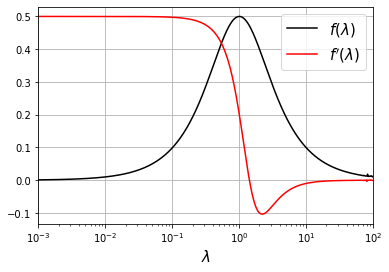

In [13]:
λ=np.logspace(np.log10(1E-3),np.log10(100),1000)
plt.semilogx(λ,f(λ),'k-',label=r'$f(\lambda)$')
plt.plot(λ,derivative(f,λ),'r-',label=r"$f'(\lambda)$")
plt.grid()
plt.xlabel(r'$\lambda$',size=15)
plt.legend(fontsize=15)
plt.xlim(λ.min(),λ.max())


B)

1.

In [3]:
np.random.seed(1)
Y=np.random.random((3,3))
Y

array([[4.17022005e-01, 7.20324493e-01, 1.14374817e-04],
       [3.02332573e-01, 1.46755891e-01, 9.23385948e-02],
       [1.86260211e-01, 3.45560727e-01, 3.96767474e-01]])

In [4]:
A=Y.transpose()@Y
A

array([[0.3000052 , 0.40912446, 0.10186666],
       [0.40912446, 0.65981688, 0.15074088],
       [0.10186666, 0.15074088, 0.16595086]])

In [5]:
λ,V=np.linalg.eig(A)

In [6]:
λo=np.argsort(λ)
λo

array([1, 2, 0])

In [7]:
U=np.c_[ tuple( np.c_[V[:,λo[i]]] for i in range(3) ) ]
U

array([[ 0.84038979, -0.09491425,  0.53360687],
       [-0.54113268, -0.2020538 ,  0.81630245],
       [-0.03033856,  0.97476435,  0.22116515]])

In [8]:
(U.transpose()@A@U).round(15)

array([[ 0.03288974, -0.        ,  0.        ],
       [-0.        ,  0.12478566, -0.        ],
       [ 0.        , -0.        ,  0.96809754]])

2.

In [9]:
from scipy import linalg

In [10]:
(v,λsqrt,u)=linalg.svd(Y)

In [11]:
λsqrt**2

array([0.96809754, 0.12478566, 0.03288974])

In [ ]:
np.linalg.eigvals(Y)